## Find country of origin of a car, given some features

This task uses the dataset https://assets.datacamp.com/production/course_1939/datasets/auto.csv.

## Setup ML framework

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

np.random.seed(42)

In [11]:
# To automatically reload modules defined in external files. Not necessary in this case, but often convenient.
%reload_ext autoreload
%autoreload 2

# To display plots directly in the notebook:
%matplotlib inline

# Load, explore and prepare data

In [12]:
# Data is downloaded with urllib
import urllib.request
url = 'https://assets.datacamp.com/production/course_1939/datasets/auto.csv'

In [13]:
# Create directory to store data
import os
if not os.path.exists('data'):
    os.makedirs('data')

In [14]:
# Retrieve and save data
urllib.request.urlretrieve(url, 'data/auto.csv')

('data/auto.csv', <http.client.HTTPMessage at 0x217a7ad34c0>)

In [16]:
# Use pandas to inspect and process data
auto = pd.read_csv('data/auto.csv')

In [17]:
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [33]:
auto.describe()

,mpg,displ,hp,weight,accel,size
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,13.679847
std,7.805007,104.644004,38.491160,849.402560,2.758864,4.264458
min,9.000000,68.000000,46.000000,1613.000000,8.000000,7.500000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,10.000000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,10.000000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,20.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,20.000000


We see that there is not missing data in the set, but we have a datatype that is not a number (origin).

In [19]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


In [23]:
auto['origin'].value_counts()

US        245
Asia       79
Europe     68
Name: origin, dtype: int64

In [24]:
auto_category = auto[["origin"]]

In [25]:
auto_category.head(10)

,origin
0,US
1,US
2,Asia
3,US
4,Europe
5,Asia
6,Asia
7,Europe
8,US
9,US


In [34]:
auto_df = auto.loc[:, auto.columns != 'origin']

## Handling the text attribute "origin"
Because most ML algorithms prefer numbers, so we want to turn the origin attribute into a number using OrdinalEncoder

In [26]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [71]:
auto_category_encoded = ordinal_encoder.fit_transform(auto_category)

In [72]:
auto_category_encoded[:10]

array([[2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.]])

In [70]:
ordinal_encoder.categories_

[array(['Asia', 'Europe', 'US'], dtype=object)]

* 0 = Asia
* 1 = Europe
* 2 = US

For convenience we add the fixed "origin" label to the dataframe

In [40]:
auto_df['label'] = auto_category_encoded

In [41]:
auto_df.head()

,mpg,displ,hp,weight,accel,size,label
0,18.0,250.0,88,3139,14.5,15.0,2.0
1,9.0,304.0,193,4732,18.5,20.0,2.0
2,36.1,91.0,60,1800,16.4,10.0,0.0
3,18.5,250.0,98,3525,19.0,15.0,2.0
4,34.3,97.0,78,2188,15.8,10.0,1.0


## Visualize the data

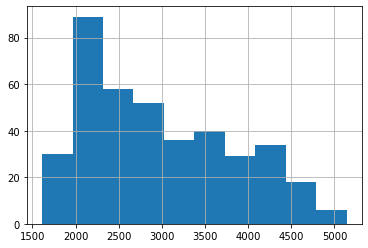

In [100]:
# The distribution of a specified feature for all the cars.
feat = "weight"
auto_df[feat].hist()

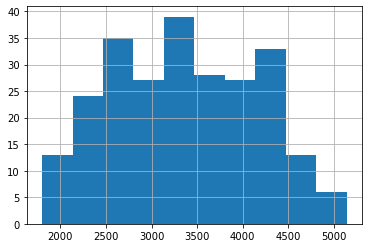

In [101]:
# The distribution of weight for a specified country
country = 2 #US
auto_df[feat][auto_df['label'] == country].hist()

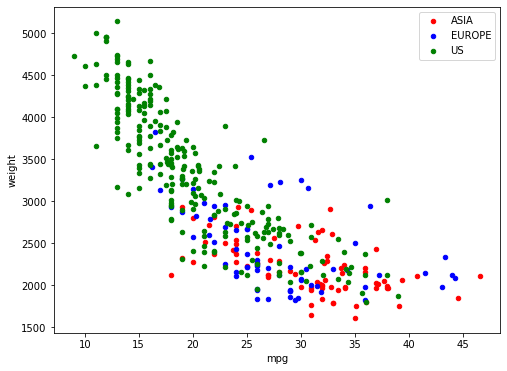

In [48]:
# Scatter plot for mpg (miles per gallon) versus weight, colored by the country of the car
ax = auto_df[auto_df['label'] == 0].plot.scatter(x='mpg', y='weight', color='red', label='ASIA', figsize=(8, 6))
auto_df[auto_df['label'] == 1].plot.scatter(x='mpg', y='weight', color='blue', label='EUROPE', ax=ax)
auto_df[auto_df['label'] == 2].plot.scatter(x='mpg', y='weight', color='green', label='US', ax=ax)

**It looks as though we might find heavier cars that consume more gasoline in the US.**

Instead of creating the above plots for each features, we can make use of pandas scatter matrix to plot each pair of features.

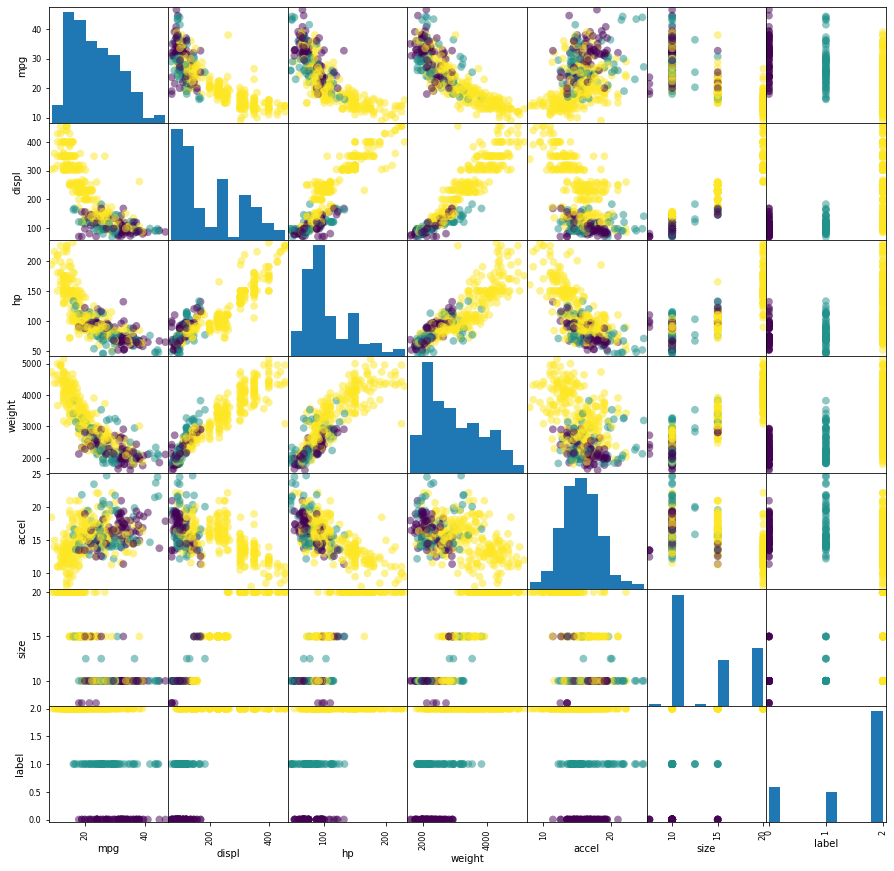

In [47]:
pd.plotting.scatter_matrix(auto_df, c=auto_df['label'], figsize=(15,15), marker='o', s=60)
plt.show()

The colors seem to be relatively separated => a good indication that we might be able to train a ML model to distinguish countries of origin based on the features.

### Selecting features
We use all the features and let X consist of all columns except our origin label:

In [73]:
X = auto_df[auto_df.columns[0: -1]]

In [74]:
X.head()

,mpg,displ,hp,weight,accel,size
0,18.0,250.0,88,3139,14.5,15.0
1,9.0,304.0,193,4732,18.5,20.0
2,36.1,91.0,60,1800,16.4,10.0
3,18.5,250.0,98,3525,19.0,15.0
4,34.3,97.0,78,2188,15.8,10.0


In [75]:
y = auto_df["label"]

In [76]:
y.head()

0    2.0
1    2.0
2    0.0
3    2.0
4    1.0
Name: label, dtype: float64

## Training and test data

We need to split data into training and test data!

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [79]:
print(f'Training data: {X_train.shape}\nTest data: {X_test.shape}')

Training data: (294, 6)
Test data: (98, 6)


## Machine Learning model
Random forest:

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100) # random_state reproducibility

In [96]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the model

In [92]:
from sklearn.metrics import accuracy_score

In [97]:
y_pred = rf.predict(X_test)

In [98]:

accuracy_score(y_test, y_pred)

0.8673469387755102

### Feature importance

In [102]:
X.describe()

,mpg,displ,hp,weight,accel,size
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,13.679847
std,7.805007,104.644004,38.491160,849.402560,2.758864,4.264458
min,9.000000,68.000000,46.000000,1613.000000,8.000000,7.500000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,10.000000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,10.000000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,20.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,20.000000


In [103]:
auto_importances = rf.feature_importances_

In [104]:
auto_importances

array([0.14787027, 0.31560882, 0.15342227, 0.18034343, 0.11656736,
       0.08618786])

In [105]:
indices = np.argsort(auto_importances)[::-1]

In [108]:
X.shape

(392, 6)

In [109]:
for f in range(X.shape[1]):
    print(f'{X.columns[indices[f]]}: {np.round(auto_importances[indices[f]], 2)}')

displ: 0.32
weight: 0.18
hp: 0.15
mpg: 0.15
accel: 0.12
size: 0.09


We see that the most important feature is engine displacement.

## Permutation Importance
More robust than feature importance

In [113]:
import eli5
from eli5.sklearn import PermutationImportance

D:\Programfiler\Anaconda3\envs\dat158\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Programfiler\Anaconda3\envs\dat158\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [114]:
perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)

In [115]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.4408 ± 0.0507,displ
0.0918 ± 0.0563,mpg
0.0816 ± 0.0183,hp
0.0694 ± 0.0925,weight
0.0490 ± 0.0523,accel
-0.0041 ± 0.0100,size


## Partial Dependence Plots


In [116]:
from pdpbox import pdp

In [118]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='displ')

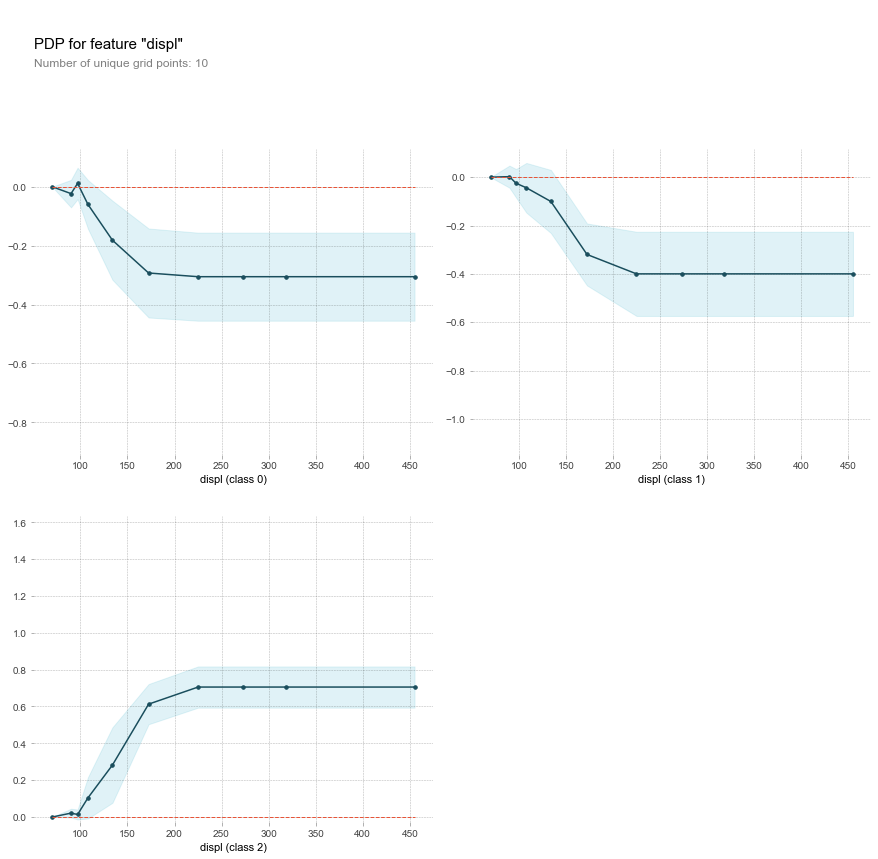

In [119]:
pdp.pdp_plot(pdp_goals, 'displ')
plt.show()

## Two-dimensional PDP

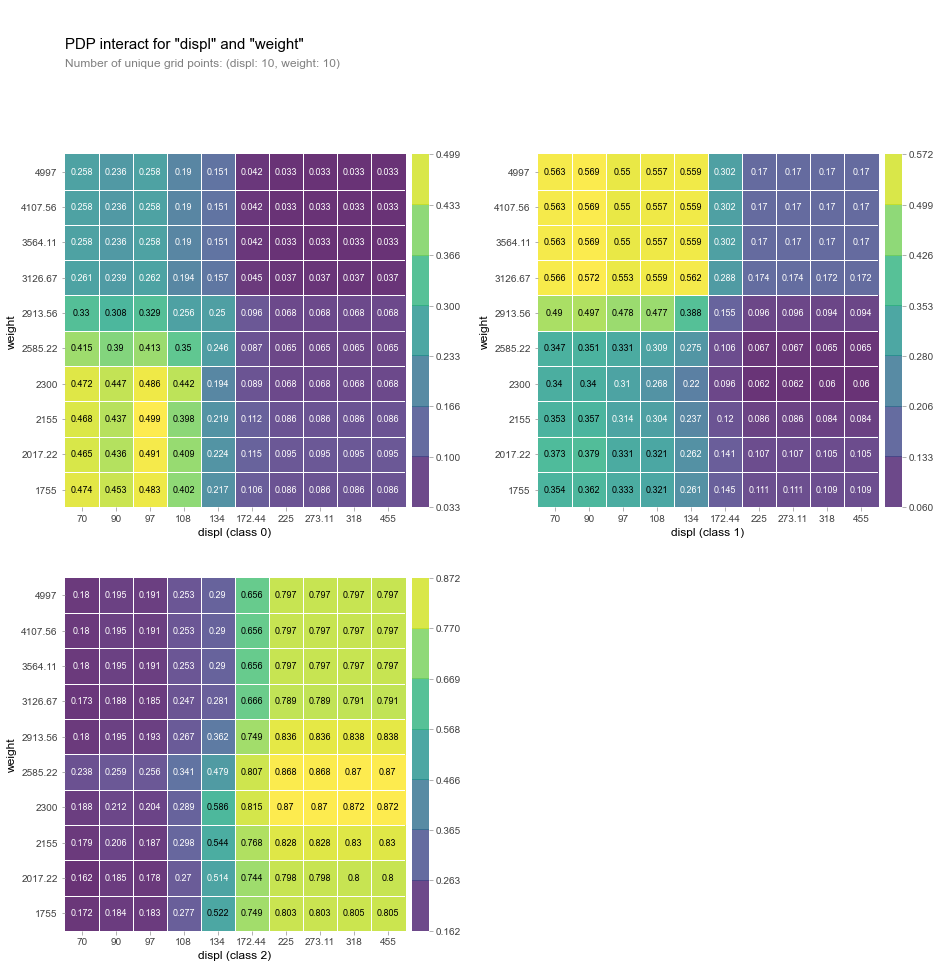

In [121]:
features = ['displ', 'weight']
interact = pdp.pdp_interact(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), features=features)

pdp.pdp_interact_plot(pdp_interact_out=interact, feature_names=features, plot_type='grid')
plt.show()